### Grip At Sparks Foundation Intern
    Name:Nithish Kumar
    Task-1: score prediction

### Simple Linear Regression Problem
    problem - To predict the exam score of the student by using the hours of study by using a ML in python. 
        Hours - independent continuous variable
        Scores - dependent continuous variable

### Importing Required Libraries and Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv')   #stores dataset in df by using read_csv
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Shape and Columns In Data

In [2]:
df.shape

(25, 2)

In [3]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

### Check for null

In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no null values ('NaN') in dataset

### Statistical Information About Data

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


The data is pretty good and doesn't require much preprocessing

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Monotonic Relationship Between Feature and Label

Inference from below plot: Hours of study is directly proportional to the Score

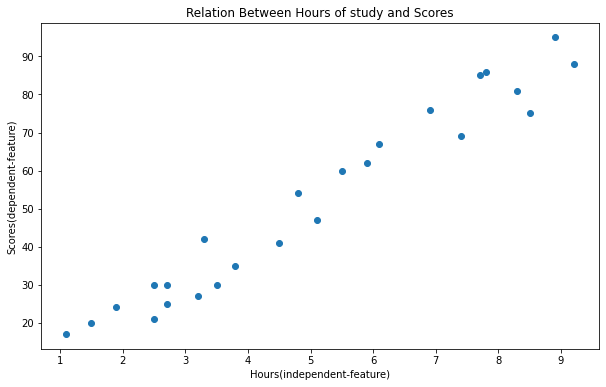

In [7]:
figure = plt.figure(figsize=(10,6))
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours(independent-feature)')
plt.ylabel('Scores(dependent-feature)')
plt.title("Relation Between Hours of study and Scores")
plt.show()

### Dividing a data into Training and Testing Phase
Dividing data into Training (80 percent) and Testing (20 percent)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['Hours']],df['Scores'],test_size = 0.2)

### Regression Model
Unlike Linear Regression, Ridge regression produce an generalized model which perform well in test data.
Ridge regression has two main benefits. 
- First, adding a penalty term reduces overfitting. 
- Second, the penalty term guarantees that we can find a solution.

In [9]:
from sklearn.linear_model import Ridge
ridge = Ridge()

### Cross Validation Accuracy
- In cross validation the given data set is divides into 5 folds , in every iteration one will be selected as test set and remaing as training set. The model is trainded by the training data set and then evaluation of the model was done and return a score. 
- This average of the score will be the final score of the model performance

In [10]:
from sklearn.model_selection import KFold,cross_val_score
fold = KFold(n_splits=5, random_state=0,shuffle=True)
scores = cross_val_score(ridge, x_train, y_train, scoring='r2', cv=fold)
scores.mean()

0.9162479970566266

### Training Data

In [11]:
model = ridge.fit(x_train,y_train)
print("model Trained successfully")

model Trained successfully


#### training and testing accuracy say that the model is general fit

In [12]:
print('accuracy of training data',model.score(x_train,y_train))
print('accuracy of test data',model.score(x_test,y_test))

accuracy of training data 0.9480624618013774
accuracy of test data 0.9680763754084585


#### Regplot

plot between the points and the best fit line

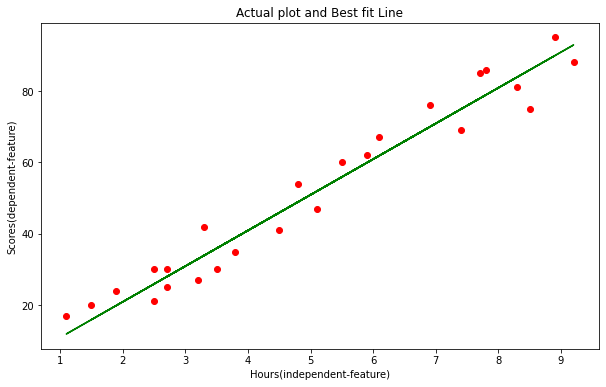

In [13]:
y = model.coef_*df[['Hours']]+model.intercept_
figure = plt.figure(figsize=(10,6))
plt.scatter(df['Hours'],df['Scores'],c='r')
plt.plot(df['Hours'],y,c='g')
plt.xlabel('Hours(independent-feature)')
plt.ylabel('Scores(dependent-feature)')
plt.title("Actual plot and Best fit Line")
plt.show()

### Prediction of test data

In [14]:
Predicted = model.predict(x_test)

A plot of actual data and predicted data in the best fit line we are able to see there is minimum error between the actual and predicted points.

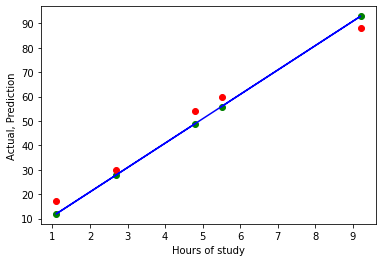

In [15]:
plt.scatter(x_test,Predicted,c = 'g')
plt.plot(x_test,Predicted,c = 'b')
plt.scatter(x_test,y_test,c = 'r')
plt.xlabel('Hours of study')
plt.ylabel('Actual, Prediction')
plt.show()

### Mean Squared Error

In [16]:
from sklearn.metrics import mean_absolute_error
print("mse = ",mean_absolute_error(y_test,Predicted))

mse =  4.261802426343147


### Prediction of future Data 

In [17]:
model.predict(np.array(9.25).reshape(1,1))

array([93.40359619])

#### Hence we conclude that the Predicted value by the ridge regression model for 9.25 hours of study is approximately 93% percentage